In [1]:
import numpy as np
from numpy.random import randn
import pandas as pd

# stats library
from scipy import stats

# plotting modules
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# iPython command to make the plots appear in the notebook
%matplotlib inline

In [8]:
dataset = randn(25)

(0, 1)

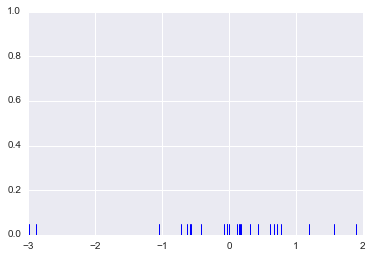

In [9]:
sns.rugplot(dataset)

plt.ylim(0, 1)

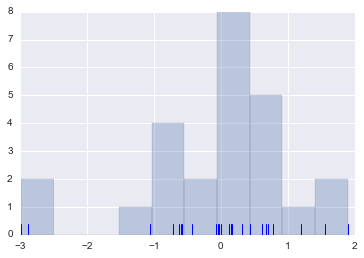

In [10]:
plt.hist(dataset, alpha=0.3)
sns.rugplot(dataset)

(0, 1)

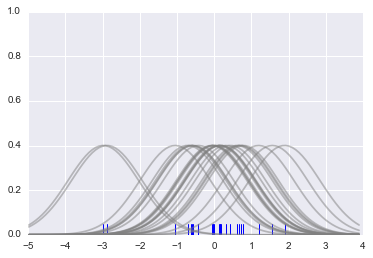

In [11]:
sns.rugplot(dataset)

x_min = dataset.min() - 2
x_max = dataset.max() + 2

x_axis = np.linspace(x_min, x_max, 100)

bandwidth = ( (4*dataset.std()**5) / (3*len(dataset))) **.02

kernel_list = []

for data_point in dataset:
    # create a kernel for each point and append it to the kernel_list
    kernel = stats.norm(data_point, bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * 0.4
    
    plt.plot(x_axis, kernel, color='grey', alpha=0.5)
    
plt.ylim(0,1)
    

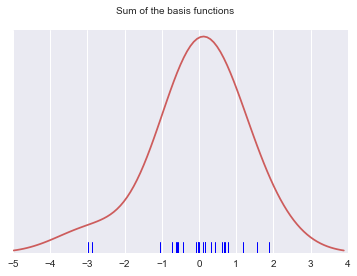

In [12]:
sum_of_kde = np.sum(kernel_list, axis=0)

fig = plt.plot(x_axis,sum_of_kde,color='indianred')

sns.rugplot(dataset)

plt.yticks([])

plt.suptitle("Sum of the basis functions")

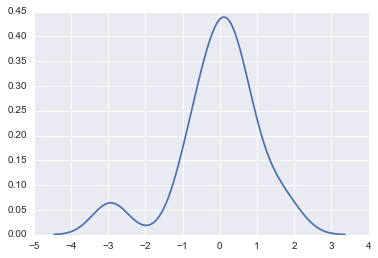

In [13]:
sns.kdeplot(dataset)

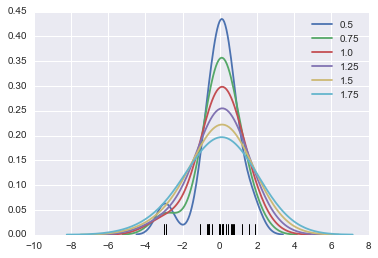

In [14]:
sns.rugplot(dataset,color='black')

for bw in np.arange(0.5, 2, 0.25):
    sns.kdeplot(dataset,bw=bw,lw=1.8,label=bw)

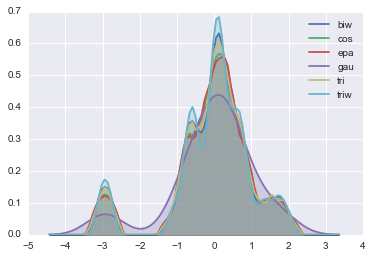

In [16]:
kernel_options = ['biw', 'cos', 'epa', 'gau', 'tri', 'triw']

for kern in kernel_options:
    sns.kdeplot(dataset,kernel=kern,label=kern, shade=True)

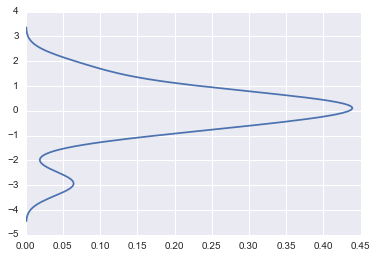

In [17]:
sns.kdeplot(dataset,vertical=True)

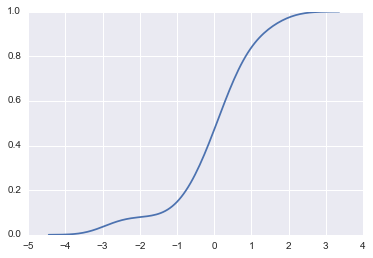

In [18]:
sns.kdeplot(dataset,cumulative=True)

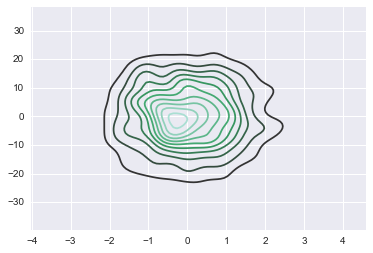

In [19]:
mean = [0,0]

cov = [[1,0],[0,100]]

dataset2 = np.random.multivariate_normal(mean,cov,1000)

dframe = pd.DataFrame(dataset2, columns=['X','Y'])

sns.kdeplot(dframe)

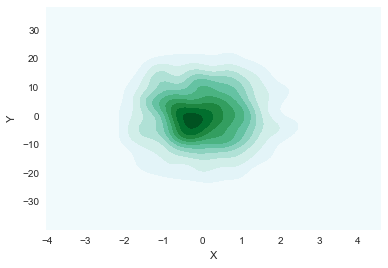

In [20]:
sns.kdeplot(dframe.X, dframe.Y,shade=True)

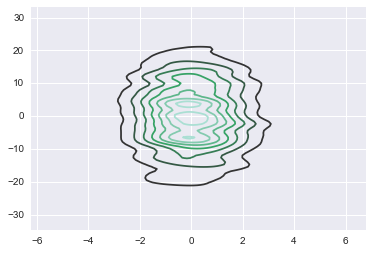

In [21]:
sns.kdeplot(dframe,bw=1)

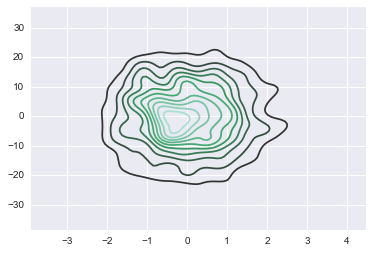

In [22]:
sns.kdeplot(dframe,bw='silverman')

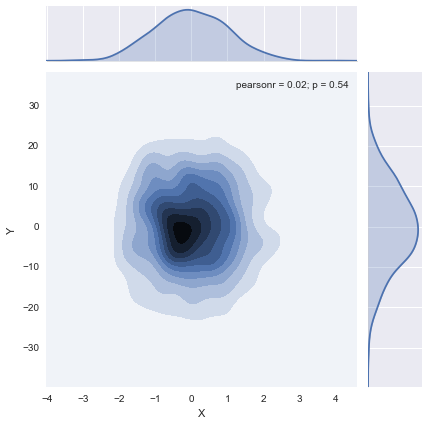

In [23]:
sns.jointplot('X', 'Y', dframe, kind='kde')